<br /><h1 style="font-family:Impact,Arial;font-size:70px;">Project Title</h1>
<h2 style="font-family:Arial;">Your full name</h2>

<p><small><font color=MediumVioletRed>Autumn 2022</font></small>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

# Abstract

Write a short (no more than 10 lines) summary of your project's topic and main goals.

## Goals

The purpose of this project is to analyze the causes and rates of people dying in New York City. As a result of this, how can we protect, from which origin people died, why did they die to reach these values.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>1. Motivation</h1>

Write a detailed description of the problem and the original goal(s) of the study. Explain why you were interested in this topic and the type of insight you were hoping to get from the data.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>2. The data</h1>
A clear description of the dataset(s) origin and a discussion of why it was chosen, as well as any restriction regarding the use, dissemination or modification of the data.

Note that wherever possible you should provide a link to the <b>unmodified, raw</b> data set.


### Why did I choose this dataset?

<h4>The reason why I chose this data set is to analyze the causes of death all over the world in our today's society and the origins of the people who died, and to see the racism rates at the same time.</h4>

In [2]:
import pandas as pd

data = pd.read_excel('nyc_leading_causes_of_death.xlsx')
data.head(3)

,Unnamed: 0,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,0,2019,Alzheimer's Disease (G30),Female,Asian and Pacific Islander,50,7.719849741,6.207494885
1,1,2019,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Other Race/ Ethnicity,30,NaN,NaN
2,2,2019,All Other Causes,Female,Other Race/ Ethnicity,28,NaN,NaN


### Dataset Description

<h4>Year : The year of death </h4>
<h4>Leading Cause : The cause of death </h4>
<h4>Sex : The decedent's sex. </h4>
<h4>Race Ethinicity : The decedent's ethnicity. </h4>
<h4>Deaths : The number of people who died due to cause of death.</h4>
<h4>Death Rate : The death rate within the sex and Race/ethnicity category </h4>
<h4>Age adjusted death rate : The age-adjusted death rate within the sex and Race/ethnicity category </h4>

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>3. Data preparation</h1>

Code and comments on how the raw data is put in a usable form (i.e., how you go from the raw data set(s) to the dataframe you are using for the analysis).

<b>Create as many code, markdown and raw cells as needed</b>

In [3]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go 
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# kullanacağımız kütüphaneleri dahil ediyoruz ilk önce

In [4]:
# sonrasında veri setimizi dahil ediyoruz
data = pd.read_excel("nyc_leading_causes_of_death.xlsx")
data.sample(5)

,Unnamed: 0,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
99,99,2019,All Other Causes,Male,Other Race/ Ethnicity,27,NaN,NaN
557,557,2012,Influenza (Flu) and Pneumonia (J09-J18),F,Hispanic,209,16.9,19.6
469,469,2012,Mental and Behavioral Disorders due to Acciden...,F,Other Race/ Ethnicity,.,.,.
959,959,2009,Alzheimer's Disease (G30),F,White Non-Hispanic,205,14.3,6.5
74,74,2019,Malignant Neoplasms (Cancer: C00-C97),Male,Not Stated/Unknown,75,92.24411483,146.1092186


In [5]:
data.info()
# daha sonrasında veri setimiz hakkında bilgiler öğreniyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1000 non-null   int64 
 1   year                     1000 non-null   int64 
 2   leading_cause            1000 non-null   object
 3   sex                      1000 non-null   object
 4   race_ethnicity           1000 non-null   object
 5   deaths                   1000 non-null   object
 6   death_rate               933 non-null    object
 7   age_adjusted_death_rate  933 non-null    object
dtypes: int64(2), object(6)
memory usage: 62.6+ KB


In [6]:
# veri setimizin büyüklüğünü inceliyoruz
data.shape

(1000, 8)

In [7]:
data.describe().T
# daha sonra veri setimizdeki özelliklerin detaylarını inceliyoruz

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
year,1000.0,2012.809,3.277692,2008.0,2010.00,2012.0,2014.00,2019.0


In [8]:
data.drop('Unnamed: 0',axis = 1,inplace = True)
data.sample(10)
#burada işimize yaramayan sütun olan Unnamed: 0 sütununu veri setimizden kaldırıyoruz

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
397,2013,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Hispanic,189,16,19
686,2011,Diabetes Mellitus (E10-E14),M,Other Race/ Ethnicity,14,.,.
867,2009,All Other Causes,F,White Non-Hispanic,1684,117.2,77.2
888,2009,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,8,.,.
775,2010,Influenza (Flu) and Pneumonia (J09-J18),F,Not Stated/Unknown,.,.,.
335,2013,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Asian and Pacific Islander,63,11.4,12.8
882,2009,Diabetes Mellitus (E10-E14),M,Hispanic,172,15.3,25.4
287,2014,"Chronic Liver Disease and Cirrhosis (K70, K73)",F,Not Stated/Unknown,.,.,.
901,2009,All Other Causes,M,Other Race/ Ethnicity,18,.,.
501,2012,"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",M,Not Stated/Unknown,8,.,.


In [9]:
# Daha sonrasında object veri türundeki olan sütunlarımızı numeric veri türüne dönüştürüyoruz
data['deaths'] = pd.to_numeric(data['deaths'],errors = "coerce")
data['death_rate'] = pd.to_numeric(data['death_rate'],errors = "coerce")
data['age_adjusted_death_rate'] = pd.to_numeric(data['age_adjusted_death_rate'],errors = "coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1000 non-null   int64  
 1   leading_cause            1000 non-null   object 
 2   sex                      1000 non-null   object 
 3   race_ethnicity           1000 non-null   object 
 4   deaths                   907 non-null    float64
 5   death_rate               645 non-null    float64
 6   age_adjusted_death_rate  645 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [10]:
# ve artık veri setimiz EDA için hazır duruma gelmiş bulunmakta.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>4. Exploratory data analysis</h1>

This is the main part of the project. Include code, plots, and detailed explanation of your analysis of the data. Be sure to include enough detail so that anyone can follow and understand what you are doing.

<b>Create as many code, markdown and raw cells as needed</b>

In [11]:
data.isnull().sum()
#ilk önce veri setimizdeki eksik veriler var mı ? eğer eksik veriler varsa hangi sütunlarda bulunuyor bunu öğrenmek için kullanıyoruz

year                         0
leading_cause                0
sex                          0
race_ethnicity               0
deaths                      93
death_rate                 355
age_adjusted_death_rate    355
dtype: int64

In [12]:
#eksik verilerimizi doldurmak için onların yerine ortalama değerleri yazacağız böylelikle eksik değerlerimizi ortadan kaldıracağız.
deaths_mean = data['deaths'].mean()
death_rate_mean = data['death_rate'].mean()
age_adjusted_death_rate_mean = data['age_adjusted_death_rate'].mean()

data['deaths'].fillna(value = deaths_mean,inplace = True)
data['death_rate'].fillna(value = death_rate_mean,inplace = True)
data['age_adjusted_death_rate'].fillna(value = age_adjusted_death_rate_mean,inplace = True)

In [13]:
data.isnull().sum()
#değerlerimizi tekrar kontrol ediyoruz ve artık eksik değerimizin olmadığını görüyoruz

year                       0
leading_cause              0
sex                        0
race_ethnicity             0
deaths                     0
death_rate                 0
age_adjusted_death_rate    0
dtype: int64

<AxesSubplot:>

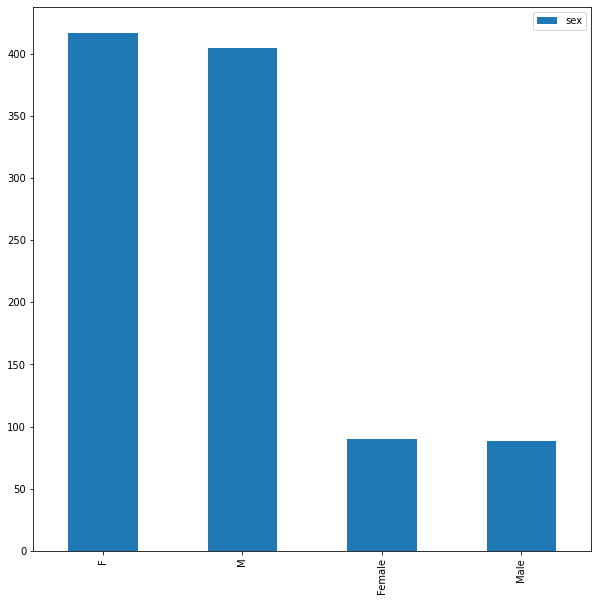

In [14]:
pd.DataFrame(data['sex'].value_counts()).plot(kind = "bar", figsize = (10,10))

<AxesSubplot:>

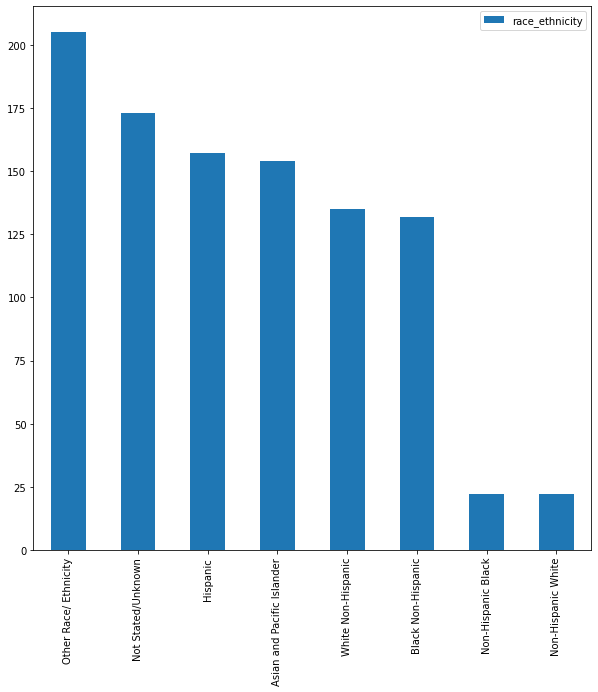

In [15]:
pd.DataFrame(data['race_ethnicity'].value_counts()).plot(kind = "bar",figsize = (10,10))

<AxesSubplot:>

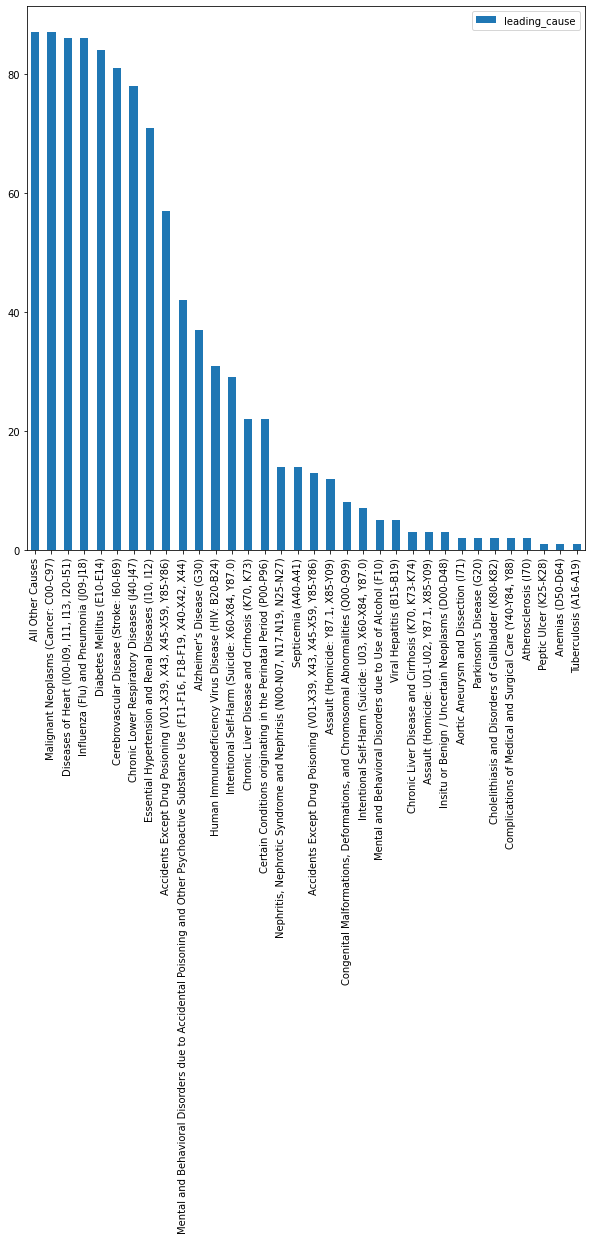

In [16]:
pd.DataFrame(data['leading_cause'].value_counts()).plot(kind = 'bar',figsize = (10,10))

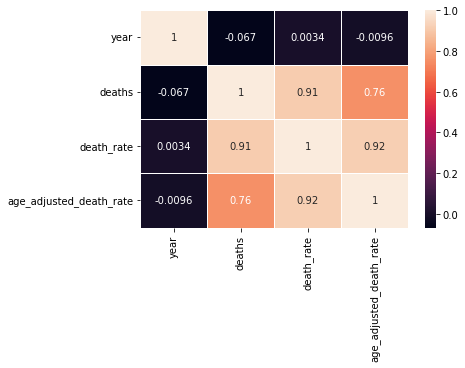

In [17]:
corr = data.corr()
sns.heatmap(corr,vmax=1,linewidths=0.8,annot = True)
plt.show()

In [18]:
cor_target = abs(corr['deaths'])

relevant_features = cor_target[cor_target>0.3]

names = [index for index,value in relevant_features.iteritems()]
names.remove('deaths')

names 

['death_rate', 'age_adjusted_death_rate']

#### Soru 1 Yıllara göre kadın-erkek ölüm oranı


In [19]:
def gender_count(x):
    
    male_count = 0
    female_count = 0
    for i in x['sex']:
        if i == 'Female' or i == 'F':
            female_count += 1
        else:
            male_count +=1
    return [male_count,female_count]

In [20]:
death_in_2019 = data.query('year == 2019')
death_in_2014 = data.query('year == 2014')
death_in_2013 = data.query('year == 2013')
death_in_2012 = data.query('year == 2012')
death_in_2011 = data.query('year == 2011')
death_in_2010 = data.query('year == 2010')
death_in_2009 = data.query('year == 2009')
death_in_2008 = data.query('year == 2008')

In [21]:
values_2019 = gender_count(death_in_2019)
values_2014 = gender_count(death_in_2014)
values_2013 = gender_count(death_in_2013)
values_2012 = gender_count(death_in_2012)
values_2011 = gender_count(death_in_2011)
values_2010 = gender_count(death_in_2010)
values_2009 = gender_count(death_in_2009)
values_2008 = gender_count(death_in_2008)

#bu fonksiyonun amacı bize 2019 yılında ölen kadın ve erkek kişilerin sayısını veriyor

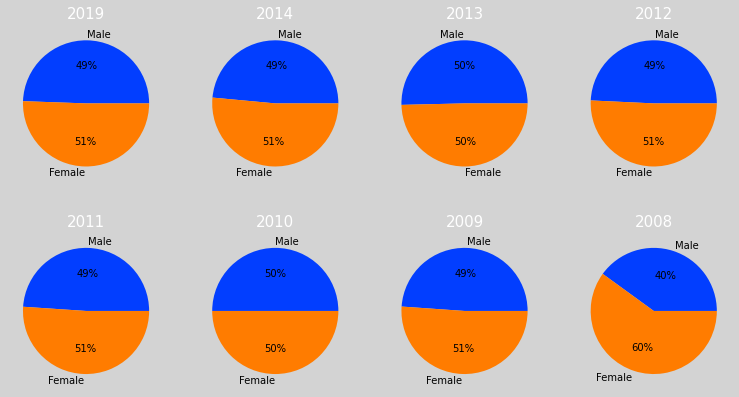

In [22]:
fig = plt.figure(figsize=(13,7))
fig.set_facecolor('lightgrey')
palette_color = sns.color_palette('bright')
labels = ['Male','Female']
ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie(values_2019,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2019',color = 'white',fontsize =15)

ax1 = plt.subplot2grid((2,4), (0, 1))
plt.pie(values_2014,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2014',color = 'white',fontsize = 15)

ax1 = plt.subplot2grid((2,4), (0, 2))
plt.pie(values_2013,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2013',color = 'white',fontsize = 15)


ax1 = plt.subplot2grid((2,4), (0, 3))
plt.pie(values_2012,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2012',color = 'white',fontsize = 15)

ax1 = plt.subplot2grid((2,4),(1,0))
plt.pie(values_2011,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2011',color = 'white',fontsize =15)

ax1 = plt.subplot2grid((2,4), (1, 1))
plt.pie(values_2010,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2010',color = 'white',fontsize = 15)

ax1 = plt.subplot2grid((2,4), (1, 2))
plt.pie(values_2009,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2009',color = 'white',fontsize = 15)

ax1 = plt.subplot2grid((2,4), (1, 3))
plt.pie(values_2008,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2008',color = 'white',fontsize = 15)

plt.show()

### Soru 2 Yıllara göre ölen insanların kökenlerin oranı

In [23]:
def count_ethnicity(x):
    other = 0
    unknown = 0
    hispanic = 0
    asian = 0
    white_non = 0
    black_non = 0
    non_hispanic_black = 0
    non_hispanic_white = 0
    for i in x['race_ethnicity']:
        if i in 'Other Race/ Ethnicity':
            other += 1
        elif i in 'Not Stated/Unknown':
            unknown += 1
        elif i in 'Hispanic':
            hispanic += 1
        elif i in 'Asian':
            asian += 1
        elif i in 'White Non-Hispanic':
            white_non +=1
        elif i in 'Black Non-Hispanic':
            black_non += 1
        elif i in 'Non-Hispanic Black':
            non_hispanic_black += 1
        else:
            non_hispanic_white += 1
    return [other,unknown,hispanic,asian,white_non,black_non,non_hispanic_black,non_hispanic_white]

    

In [24]:
values_2019 = count_ethnicity(death_in_2019)
values_2014 = count_ethnicity(death_in_2014)
values_2013 = count_ethnicity(death_in_2013)
values_2012 = count_ethnicity(death_in_2012)
values_2011 = count_ethnicity(death_in_2011)
values_2010 = count_ethnicity(death_in_2010)
values_2009 = count_ethnicity(death_in_2009)
values_2008 = count_ethnicity(death_in_2008)


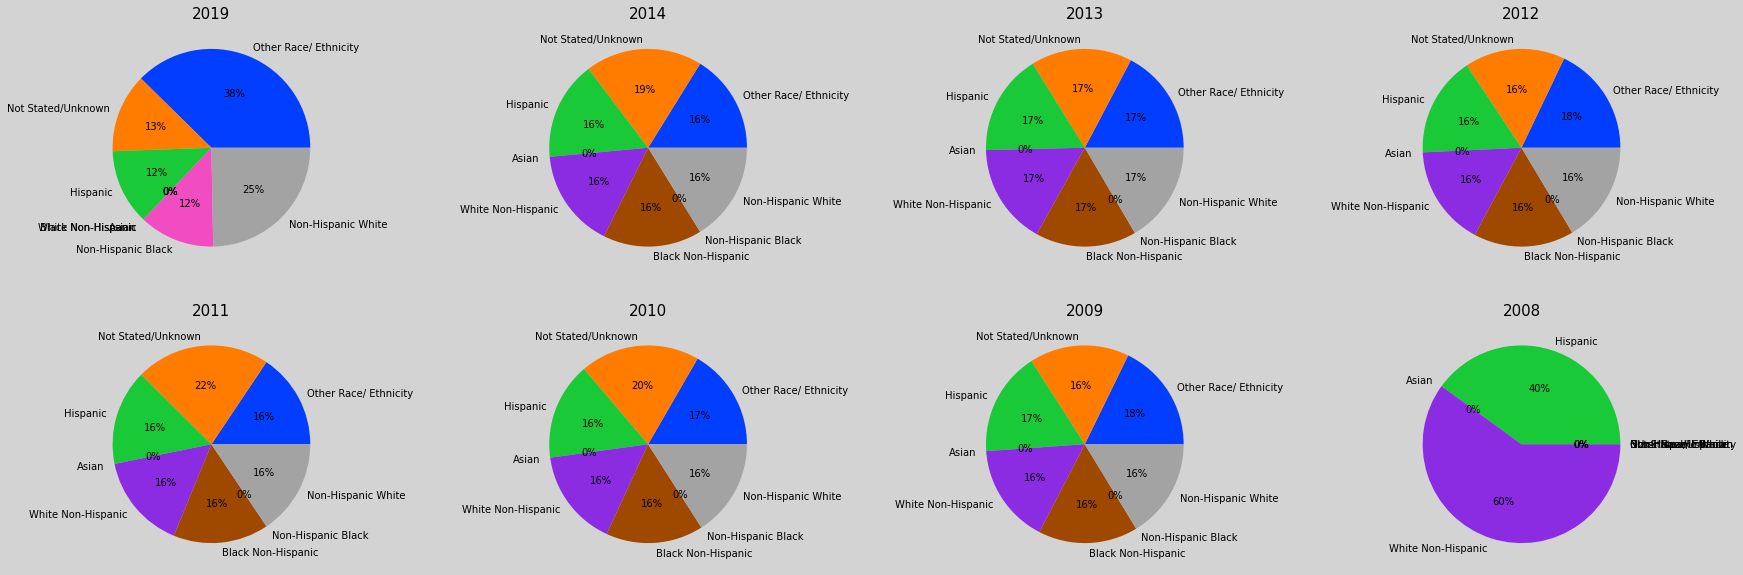

In [25]:
fig = plt.figure(figsize=(30,10))
fig.set_facecolor('lightgrey')

palette_color = sns.color_palette('bright')

labels = ['Other Race/ Ethnicity', 'Not Stated/Unknown','Hispanic','Asian','White Non-Hispanic','Black Non-Hispanic','Non-Hispanic Black','Non-Hispanic White']

ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie(values_2019,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2019',fontsize =15)

ax1 = plt.subplot2grid((2,4), (0, 1))
plt.pie(values_2014,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2014',fontsize = 15)

ax1 = plt.subplot2grid((2,4), (0, 2))
plt.pie(values_2013,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2013',fontsize = 15)


ax1 = plt.subplot2grid((2,4), (0, 3))
plt.pie(values_2012,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2012',fontsize = 15)

ax1 = plt.subplot2grid((2,4),(1,0))
plt.pie(values_2011,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2011',fontsize =15)

ax1 = plt.subplot2grid((2,4), (1, 1))
plt.pie(values_2010,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2010',fontsize = 15)

ax1 = plt.subplot2grid((2,4), (1, 2))
plt.pie(values_2009,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2009',fontsize = 15)

ax1 = plt.subplot2grid((2,4), (1, 3))
plt.pie(values_2008,labels = labels,colors = palette_color, autopct = '%.0f%%')
plt.title('2008',fontsize = 15)

plt.show()

### Yıllara göre ölüm sebepleri dağılımı

<AxesSubplot:>

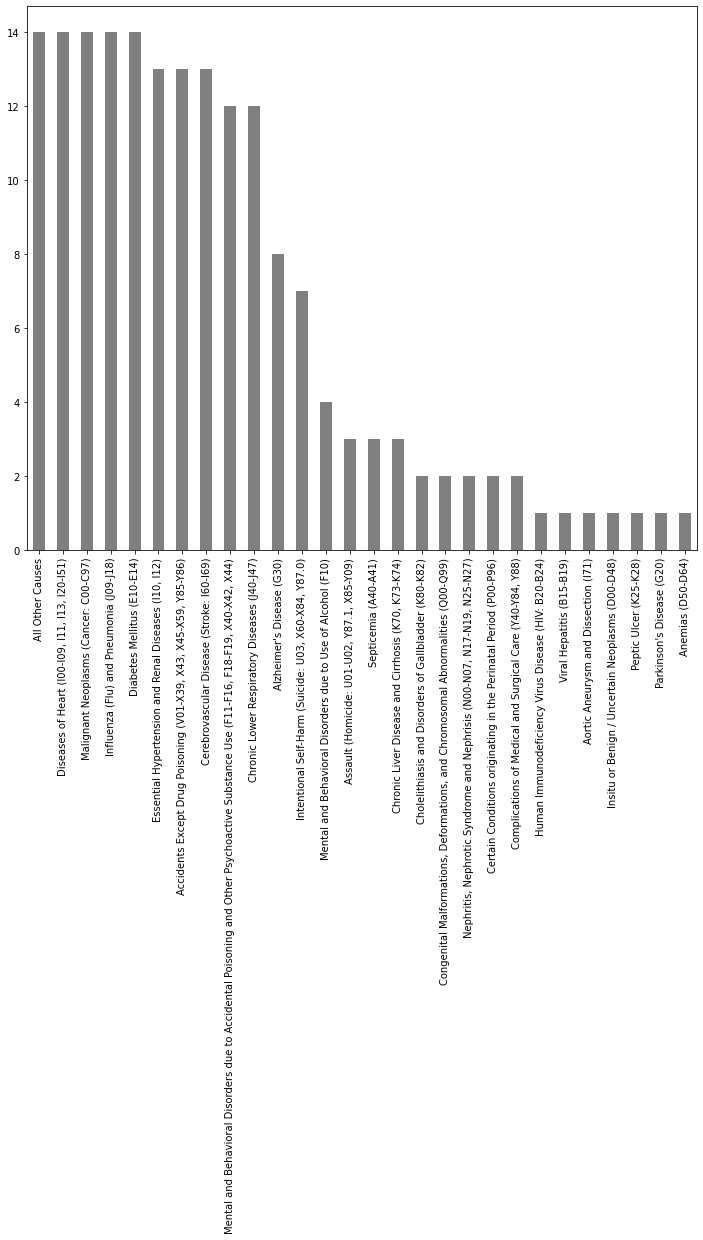

In [26]:
death_in_2019['leading_cause'].value_counts().plot(kind = 'bar',figsize = (12,10),color = 'grey')


<AxesSubplot:>

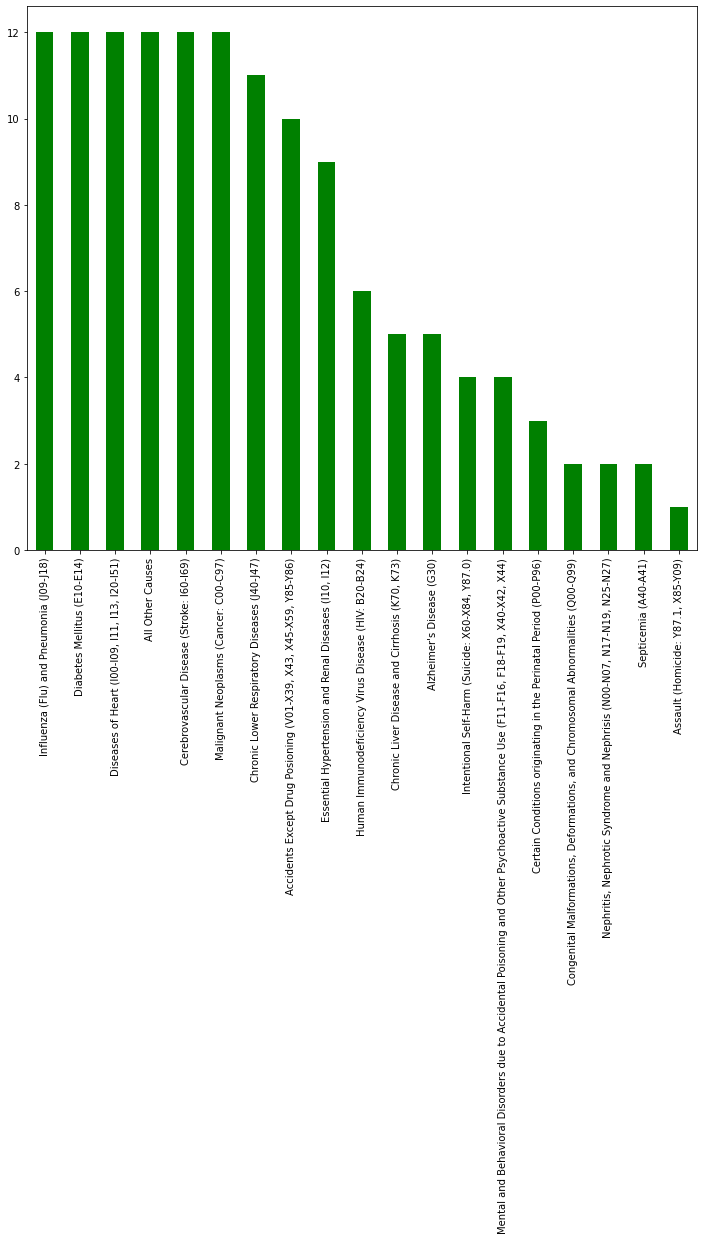

In [27]:
death_in_2014['leading_cause'].value_counts().plot(kind = 'bar',figsize = (12,10),color = 'g')


<AxesSubplot:>

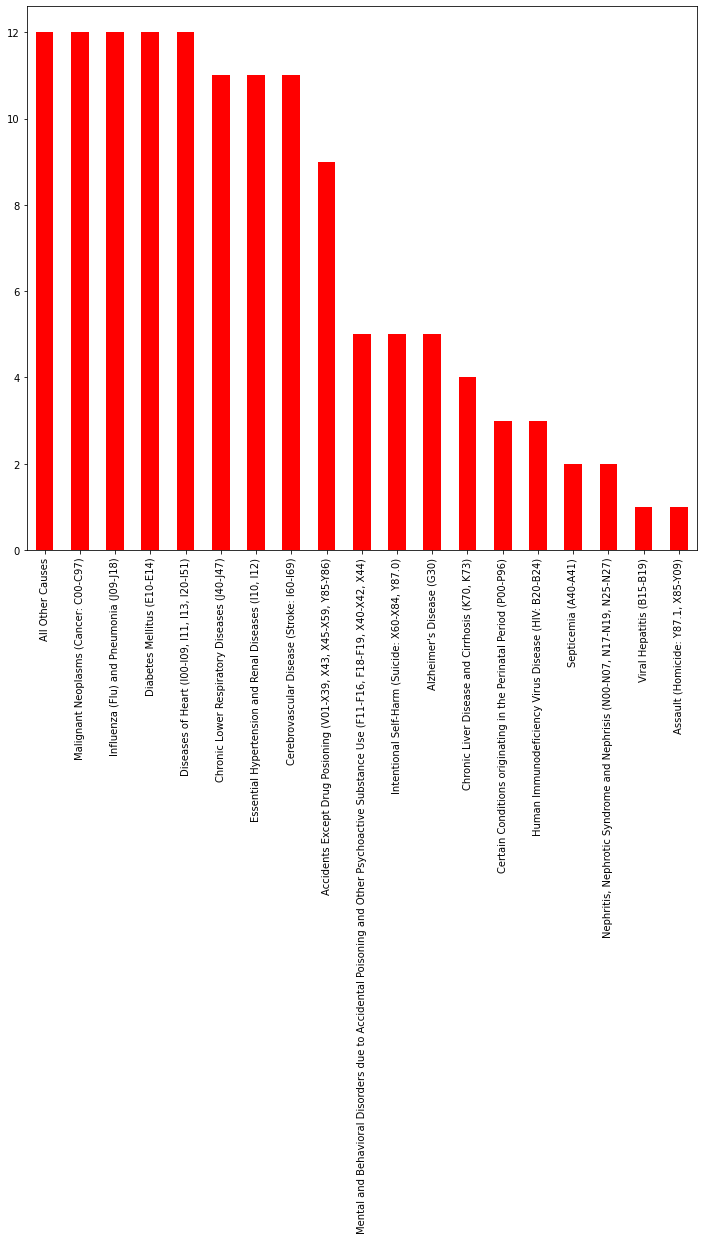

In [28]:
death_in_2013['leading_cause'].value_counts().plot(kind = 'bar',figsize = (12,10),color = 'r')

<AxesSubplot:>

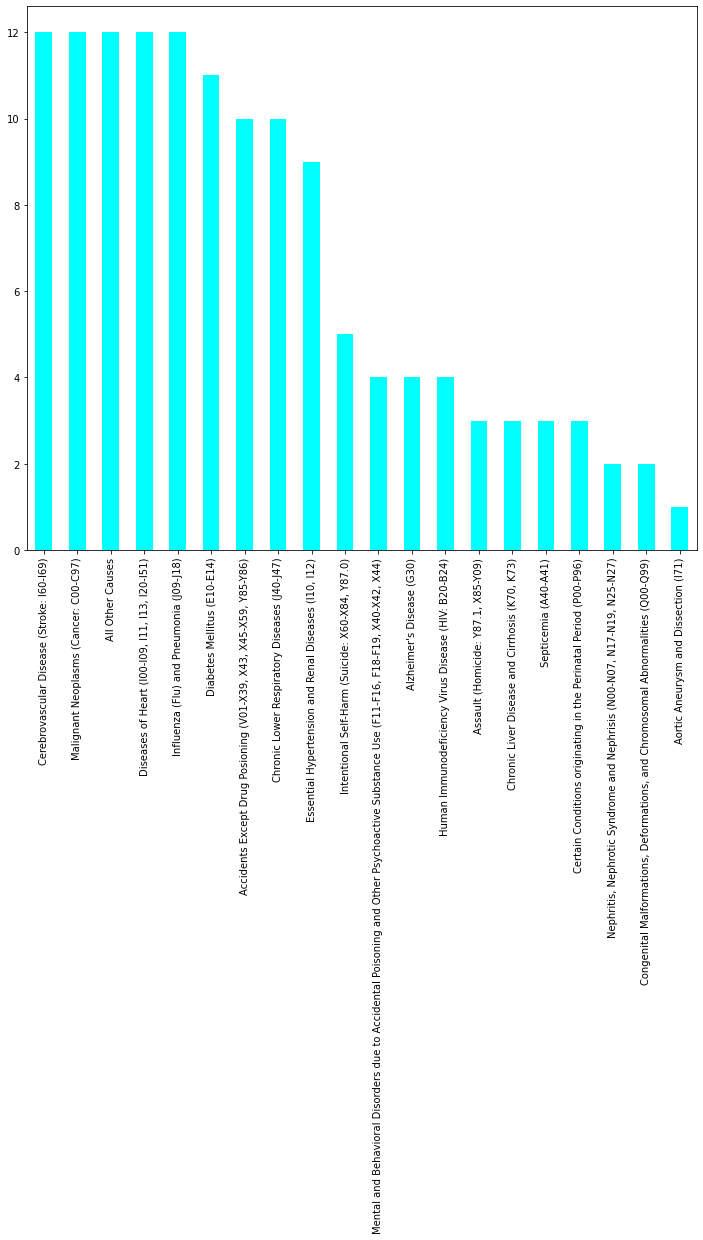

In [29]:
death_in_2012['leading_cause'].value_counts().plot(kind = 'bar',figsize = (12,10),color = 'aqua')


<AxesSubplot:>

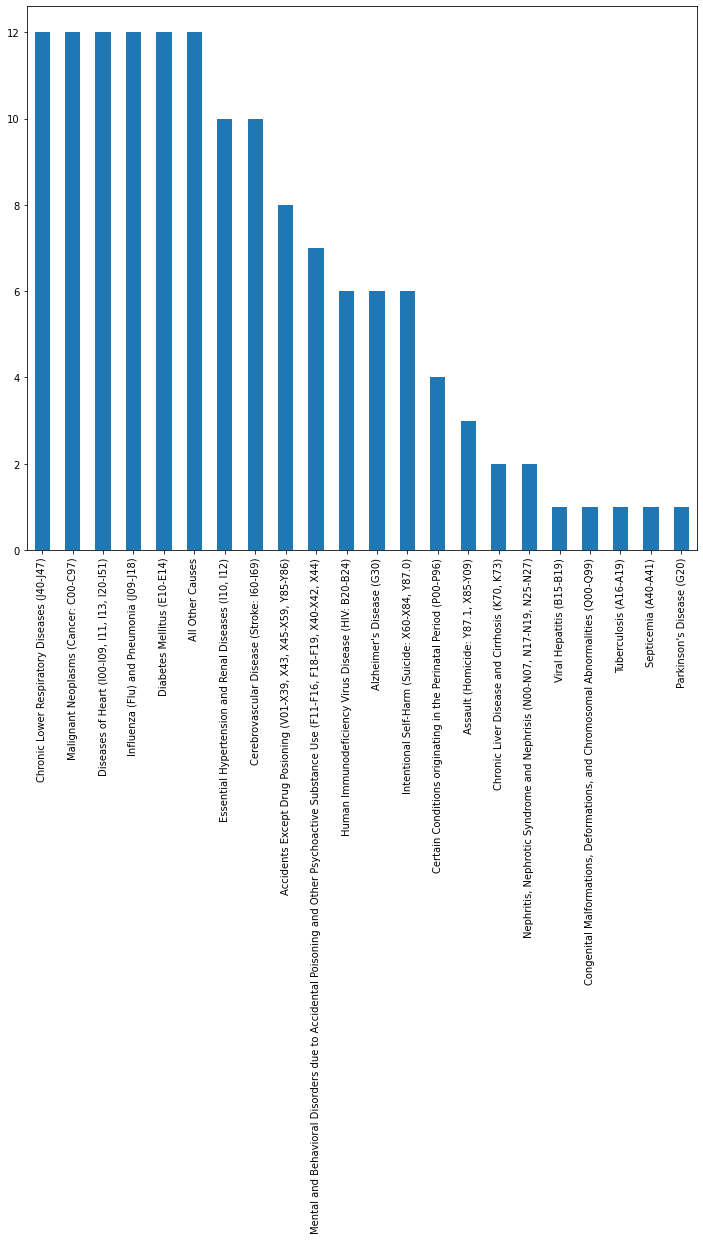

In [30]:
death_in_2011['leading_cause'].value_counts().plot(kind = 'bar',figsize = (12,10))


<AxesSubplot:>

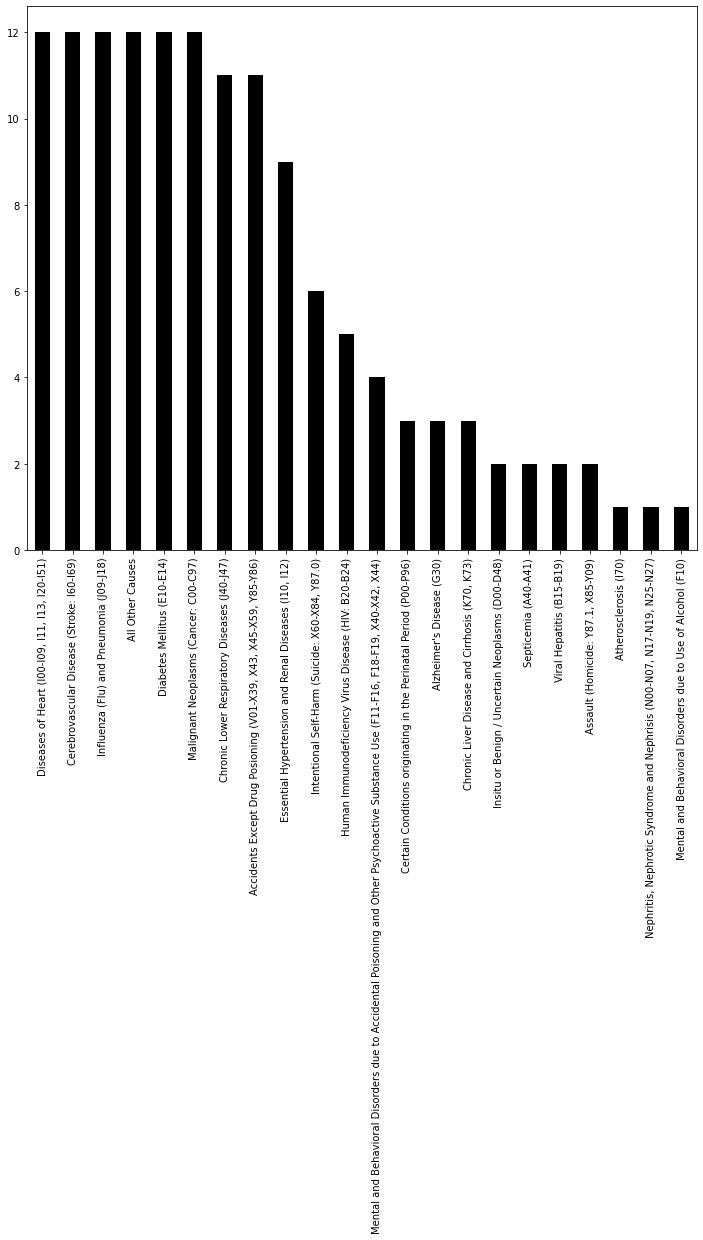

In [31]:
death_in_2010['leading_cause'].value_counts().plot(kind = 'bar',figsize = (12,10),color = 'black')


<AxesSubplot:>

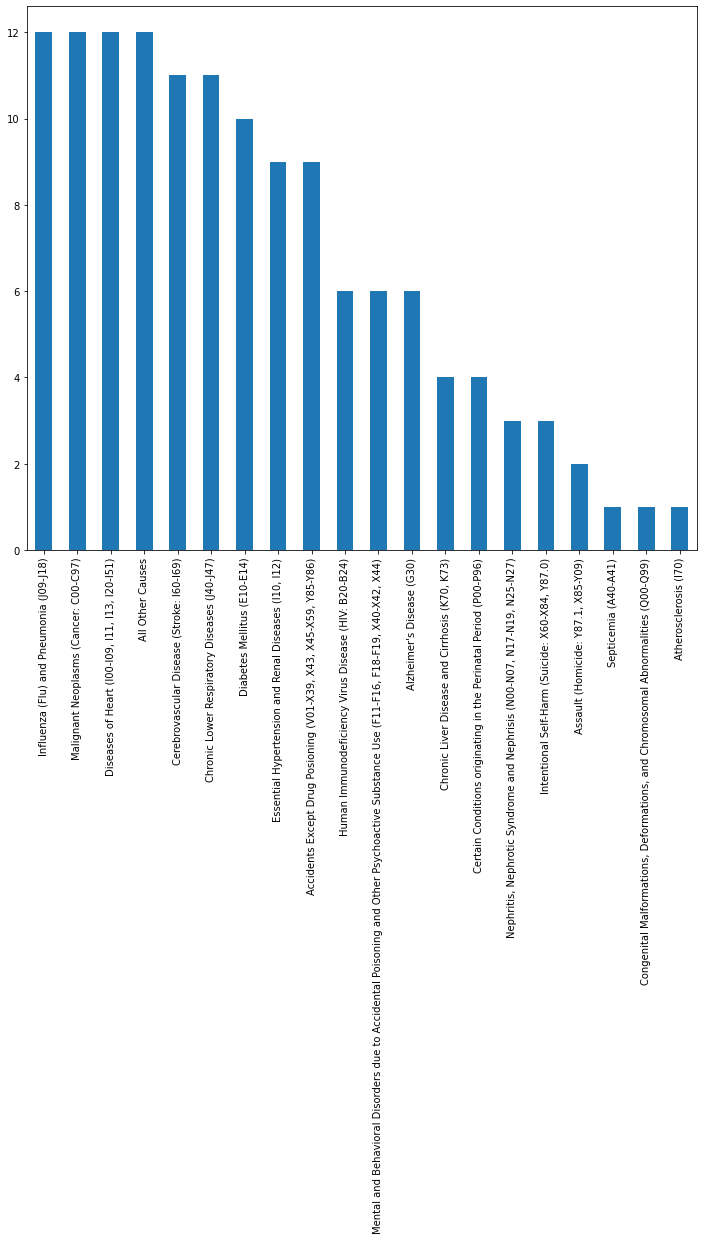

In [32]:
death_in_2009['leading_cause'].value_counts().plot(kind = 'bar',figsize = (12,10))


<AxesSubplot:>

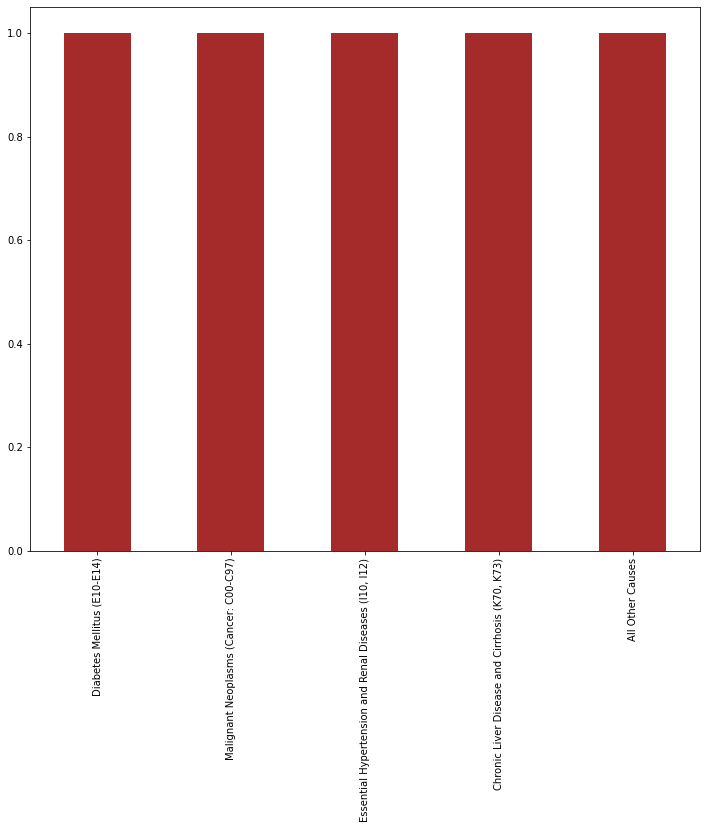

In [33]:
death_in_2008['leading_cause'].value_counts().plot(kind = 'bar',figsize = (12,10),color = 'brown')


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>5. Results/Insights</h1>

Discuss any non-trivial result or insight into the problem stemming from your analysis.

<b>Create as many code, markdown and raw cells as needed</b>

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>6. In hindsight...</h1>

In this section you should reflect on your work and what you've learned. In particular you should include:

<ul>
    <li> a discussion of the most challenging aspect of the data analysis and if/how you overcame the challenge.</li>
    <li> a discussion of any programming technique and/or reference you found particularly useful or helpful for your project.</li>
    <li> an assessment of the outcome of the study in relation to the original goals (i.e., have the goals been reached, or did you have to reassess the goals during the project, and if so why?).</li>
    <li> a discussion of what new, or surprising knowledge or insight into the problem you've gained by conducting the study.</li>
    <li> a discussion of whether you would approach the problem differently if given an opportunity to redo the work, and any advice you would give to someone who would want to work on a similar problem.</li>
    <li> a discussion of how your analysis could be improved or extended in future work.</li>

</ul>